In [1]:
!pwd

/home/vdaza/compact_goups_Nov/plots/void


**Funtions**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
import pandas as pd
from matplotlib.cbook import boxplot_stats

In [3]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

**Load**

In [4]:
df = pd.read_table('dist_cg_void_3.dat',names=['GId','estado','tipo_vv'],
                 sep="\s+")
display(df.head(3))
display(df.shape)

,GId,estado,tipo_vv
0,1,1,1.0
1,2,1,0.0
2,3,1,0.0


(449, 3)

In [5]:
df.shape

(449, 3)

In [6]:
df1 = df[df.loc[:, 'estado'] != 1]

In [7]:
df1.shape

(29, 3)

# Distancias

In [8]:
cgF=pd.read_table('dist_cg_void.dat',names=['GId','Ng','alcm','delcm','zmean','radiop','mu','sigmav','rbri','flag_cg','rcomv_cg','dij_N',
                                            'estado','tipo_vv', 'dijp_1000','t_cross','Rp'], sep="\s+")
display(cgF.head(3))
display(cgF.shape)

,GId,Ng,alcm,delcm,zmean,radiop,mu,sigmav,rbri,flag_cg,rcomv_cg,dij_N,estado,tipo_vv,dijp_1000,t_cross,Rp
0,1,4,114.842,45.103,0.078292,2.620,25.018,348.679,14.719,0,230.282935,1.328269,1,1.0,************,0.037275,87.756597
1,2,4,116.577,22.020,0.046817,4.090,25.289,274.092,14.289,0,138.758218,1.860876,1,0.0,92313.200000,0.030544,82.543708
2,3,4,117.288,21.762,0.024476,9.769,26.134,136.700,13.359,0,72.920958,2.570684,1,0.0,************,0.116391,103.608818


(449, 17)

In [9]:
cgF1 = cgF[cgF['estado'] != 1]

In [10]:
cgF1.shape

(29, 17)

# CV-S

In [11]:
cgS=cgF1[cgF1['tipo_vv']>0]
display(cgS.shape)
cgS.dij_N.describe()

(20, 17)

count    20.000000
mean      0.843650
std       0.216327
min       0.424383
25%       0.698098
50%       0.896342
75%       1.044758
max       1.098577
Name: dij_N, dtype: float64

# CV-R

In [12]:
cgR=cgF1[cgF1['tipo_vv']==0]
display(cgR.shape)
cgR.dij_N.describe()

(9, 17)

count    9.000000
mean     0.953535
std      0.147419
min      0.638538
25%      0.956546
50%      1.039340
75%      1.045260
max      1.057515
Name: dij_N, dtype: float64

In [13]:
# importing libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter

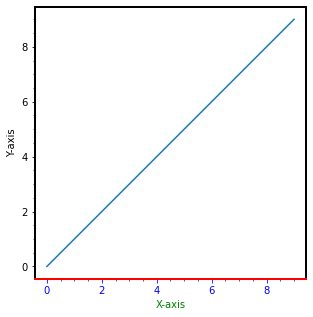

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(10))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('green')
ax.minorticks_on()
[i.set_linewidth(2.0) for i in ax.spines.values()]



ax.set_aspect(1)
ax.tick_params(axis='x', colors='blue')

plt.show()

medianF 0.956546
medianR 1.03934
medianS 0.8963415


0.447213595499958

/home/vdaza/miniconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vdaza/miniconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vdaza/miniconda3/envs/machine-learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

<Figure size 400x400 with 0 Axes>

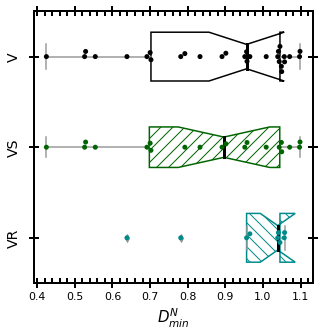

In [58]:
medianF=np.median(cgF1.dij_N)
print('medianF',medianF)
medianR=np.median(cgR.dij_N)
print('medianR',medianR)
medianS=np.median(cgS.dij_N)
print('medianS',medianS)

plt.rcParams['figure.figsize'] = 5, 5
plt.figure(figsize=(5,5), dpi=80, facecolor='b', edgecolor='blue')

####subfiguras
f, (ax_box_F, ax_box_S, ax_box_R) = plt.subplots(3, sharex='col',
                                                         gridspec_kw = {'height_ratios':[15,15,15]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.0)

#####boxplot

medianprops = dict(color='black',linewidth=3)
#marker='D', markeredgecolor='black'

TF=29**(0.5)
TR=9**(0.5)
TS=20**(0.5)
display(TS*0.1)

boxF=sns.boxplot(cgF1.dij_N, ax=ax_box_F, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
sns.swarmplot(x=cgF1.dij_N, color="black", ax=ax_box_F)


boxS=sns.boxplot(cgS.dij_N, ax=ax_box_S, notch= True, color='white', width=TS*0.1, medianprops=medianprops) 
sns.swarmplot(x=cgS.dij_N, color="#006400", ax=ax_box_S)


boxR=sns.boxplot(cgR.dij_N, ax=ax_box_R, notch= True, color='white', width=TF*0.1, medianprops=medianprops)
sns.swarmplot(x=cgR.dij_N, color="#008B8B", ax=ax_box_R)





# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None

#quitar los bordes
#sns.despine (ax = ax_hist)
sns.despine (ax = ax_box_F, left=False, bottom=True, top=False, right=False)
sns.despine (ax = ax_box_S, left=False, bottom=True, top=True, right=False)
sns.despine (ax = ax_box_R, left=False, bottom=False, top=True, right=False)


ax_box_F.yaxis.get_ticklocs(minor=True)     # []
ax_box_F.xaxis.get_ticklocs(minor=True)     # []

ax_box_S.yaxis.get_ticklocs(minor=True)     # []
ax_box_S.xaxis.get_ticklocs(minor=False)     # []

ax_box_R.yaxis.get_ticklocs(minor=True)     # []
ax_box_R.xaxis.get_ticklocs(minor=True)     # []


ax_box_F.tick_params(bottom=False, labelbottom=False, 
               top = True, labeltop = False,
               right = True, labelright = True, 
               left = True, labelleft = True)
ax_box_F.tick_params(which='minor', direction='in', 
                     length=5, width=2, colors='black',
                     grid_color='r', grid_alpha=0.5)
ax_box_F.tick_params(which='major', direction='inout', 
               length=10, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
[i.set_linewidth(2.0) for i in ax_box_F.spines.values()]

ax_box_S.tick_params(bottom=False, labelbottom=False, 
               top = False, labeltop = False,
               right = True, labelright = True, 
               left = True, labelleft = True)
#ax_box_S.tick_params(which='minor', direction='in', 
#               length=5, width=1, colors='black',
#               grid_color='r', grid_alpha=0.5)
ax_box_S.tick_params(which='major', direction='inout', 
               length=10, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
[i.set_linewidth(2.0) for i in ax_box_S.spines.values()]

ax_box_R.tick_params(bottom = True, labelbottom=True, 
               top=False, labeltop=False,
               right = True, labelright = True, 
               left = True, labelleft = True)
ax_box_R.tick_params(which='minor', direction='in', 
               length=5, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
ax_box_R.tick_params(which='major', direction='inout', 
               length=10, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
# Tamaño
ax_box_R.xaxis.set_tick_params(labelsize=11)
[i.set_linewidth(2.0) for i in ax_box_R.spines.values()]

#Modifico los ticks
#ax_hist.tick_params(axis='x',direction ='inout',labelbottom =True)
#ax_box_F.tick_params(bottom = False,labelbottom = False)
#ax_box_S.tick_params(bottom = False,labelbottom = False)
#ax_box_R.tick_params(bottom = True, labelbottom = True, which='minor', direction='in')


# Initialize minor ticks
ax_box_F.minorticks_on()
ax_box_S.minorticks_on()
ax_box_R.minorticks_on()


# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=True)


####hist
#ax_hist.hist(cgF.dij_N, bins = np.arange(min(cgF.dij_N)-0.1,max(cgF.dij_N)+0.2,0.2),linestyle='solid',
         #histtype='bar',linewidth=2,color='slateblue',label= 'VC F',
          #   weights=np.ones_like(cgF.dij_N)/float(len(cgF.dij_N)))


plt.setp(boxF.artists,edgecolor='black')
plt.setp(boxR.artists,hatch="\\\\",edgecolor='#008B8B')
plt.setp(boxS.artists,hatch="//",edgecolor='darkgreen')


#box
#plt.xlabel(r'distancias mínimas cg-voids',fontsize=11)
#plt.ylabel('Frecuencia')
#plt.legend(loc="upper right")
#plt.legend(frameon=True)


#muestra_F = mpatches.Patch(color='bisque', label='voids F')
#muestra_R = mpatches.Patch(color='seagreen', label='voids R',hatch='\\\\',
                           #linewidth=2,linestyle='solid')
#muestra_S = mpatches.Patch(color='blue', label='voids S',hatch='////',
                           #linewidth=2,linestyle='solid')
#ax_hist.legend(handles=[muestra_F,muestra_R,muestra_S],loc=1,fontsize=7)

#plt.xlim((0.8,3.2))


ax_box_F.set_ylabel(r'V', fontsize=14)
ax_box_R.set_ylabel(r'VR', fontsize=14)
ax_box_S.set_ylabel(r'VS', fontsize=14)

ax_box_S.set_xlabel('')
ax_box_R.set_xlabel(r'$D_{min}^{N}$', fontsize=15)


plt.savefig('distancias_cg_void.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [ ]:
pwd

## match

In [ ]:
GId_cgF1 = cgF1.GId.to_list()

In [ ]:
pasivas = pd.read_csv('df_pasiva.csv')
display(pasivas.head(2))
display(pasivas.shape)
i_gru_pasivas = pasivas.i_gru.to_list()

In [ ]:
display(cgF1.head(2))

In [ ]:
diferencia = diff(i_gru_pasivas, GId_cgF1)
pasivas1 = pasivas.set_index('i_gru').drop(diferencia)

In [ ]:
pasivas1 = pasivas1.reset_index()

In [ ]:
pasivas1.shape

In [ ]:
cgF1.head(2)

In [ ]:
pasivas1['dij_N'] = cgF1.dij_N.values
pasivas1['tipo_vv'] = cgF1.tipo_vv.values

In [ ]:
pasivas1.head(6)

In [ ]:
plt.scatter(pasivas1.dij_N, pasivas1.frac)
plt.xlabel('dist')
plt.ylabel('Frac')
plt.title('Grupos compactos')

In [ ]:
cgF1 = pasivas1

In [ ]:
menor_bri = pasivas1.frac < 0.5
dij_minor = pasivas1[menor_bri]
mayor_bri = pasivas1.frac >= 0.5
dij_mayor = pasivas1[mayor_bri]

# CV-S

In [ ]:
cgS=cgF1[cgF1['tipo_vv']>0]
display(cgS.shape)
cgS.dij_N.describe()

In [ ]:
menor_bri = cgS.frac < 0.5
dij_minorS = cgS[menor_bri]
mayor_bri = cgS.frac >= 0.5
dij_mayorS = cgS[mayor_bri]

# CV-R

In [ ]:
cgR=cgF1[cgF1['tipo_vv']==0]
display(cgR.shape)
cgR.dij_N.describe()

In [ ]:
menor_bri = cgR.frac < 0.5
dij_minorR = cgR[menor_bri]
mayor_bri = cgR.frac >= 0.5
dij_mayorR = cgR[mayor_bri]

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
medianF=np.median(cgF1.dij_N)
print('medianF',medianF)
medianR=np.median(cgR.dij_N)
print('medianR',medianR)
medianS=np.median(cgS.dij_N)
print('medianS',medianS)

plt.figure(figsize=(5,50))

####subfiguras
f, (ax_box_F,ax_box_R,ax_box_S) = plt.subplots(3, sharex='col',
                                                         gridspec_kw = {'height_ratios':[15,15,15]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.0)

#quitar los bordes
#sns.despine (ax = ax_hist)
sns.despine (ax = ax_box_F,left=False,bottom=True)
sns.despine (ax = ax_box_R,left=False,bottom=True)
sns.despine (ax = ax_box_S,left=False,bottom=False)

#Modifico los ticks
#ax_hist.tick_params(axis='x',direction ='inout',labelbottom =True)
ax_box_F.tick_params(bottom = False,labelbottom = False)
ax_box_R.tick_params(bottom = False,labelbottom = False)
ax_box_S.tick_params(bottom = True,labelbottom = True, which='minor', direction='in')
#ax.minorticks_on()
#ax.tick_params(labelsize=16)
##ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right=True,top=True)
#ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right=True,top=True)

ax_box_S.xaxis.set_tick_params(labelsize=14)


####hist
#ax_hist.hist(cgF.dij_N, bins = np.arange(min(cgF.dij_N)-0.1,max(cgF.dij_N)+0.2,0.2),linestyle='solid',
         #histtype='bar',linewidth=2,color='slateblue',label= 'VC F',
          #   weights=np.ones_like(cgF.dij_N)/float(len(cgF.dij_N)))

#####boxplot

medianprops = dict(color='black',linewidth=3)
#marker='D', markeredgecolor='black'

TF=29**(0.5)
TR=9**(0.5)
TS=20**(0.5)
display(TS*0.1)

boxF=sns.boxplot(cgF1.dij_N, ax=ax_box_F, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
sns.swarmplot(x=dij_minor.dij_N, color="blue", ax=ax_box_F)
sns.swarmplot(x=dij_mayor.dij_N, color="red", ax=ax_box_F)

boxR=sns.boxplot(cgR.dij_N, ax=ax_box_R, notch= True, color='white', width=TF*0.1,
            medianprops=medianprops)
sns.swarmplot(x=dij_minorR.dij_N, color="blue", ax=ax_box_R)
sns.swarmplot(x=dij_mayorR.dij_N, color="red", ax=ax_box_R)

boxS=sns.boxplot(cgS.dij_N, ax=ax_box_S, notch= True, color='white', width=TS*0.1, medianprops=medianprops) 
sns.swarmplot(x=dij_minorS.dij_N, color="blue", ax=ax_box_S)
sns.swarmplot(x=dij_mayorS.dij_N, color="red", ax=ax_box_S)

plt.setp(boxF.artists,edgecolor='black')
plt.setp(boxR.artists,hatch="\\\\",edgecolor='deepskyblue')
plt.setp(boxS.artists,hatch="//",edgecolor='darkgreen')


#box
#plt.xlabel(r'distancias mínimas cg-voids',fontsize=11)
#plt.ylabel('Frecuencia')
#plt.legend(loc="upper right")
#plt.legend(frameon=True)


#muestra_F = mpatches.Patch(color='bisque', label='voids F')
#muestra_R = mpatches.Patch(color='seagreen', label='voids R',hatch='\\\\',
                           #linewidth=2,linestyle='solid')
#muestra_S = mpatches.Patch(color='blue', label='voids S',hatch='////',
                           #linewidth=2,linestyle='solid')
#ax_hist.legend(handles=[muestra_F,muestra_R,muestra_S],loc=1,fontsize=7)

#plt.xlim((0.8,3.2))


ax_box_F.set_ylabel(r'$CG_{V}$', fontsize=16)
ax_box_R.set_ylabel(r'$CG_{V_{R}}$', fontsize=16)
ax_box_S.set_ylabel(r'$CG_{V_{S}}$', fontsize=16)

ax_box_R.set_xlabel('')
ax_box_S.set_xlabel(r'$D_{min}^{N}$',fontsize=17)


plt.savefig('distancias_cg_void_frac.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [ ]:
ax.minorticks_on()
ax.tick_params(labelsize=16)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right=True,top=True)